**Named Entity Recognition (NER)** is a fundamental task in natural language processing (NLP) that involves identifying and categorizing entities such as *people, organizations, locations, and more* in unstructured text. 
**Huggingface** is a popular NLP library that provides several datasets and pre-trained models for NER tasks, making it easier for developers to build NER applications.

In this Notebook, we will provide an overview of NER, explain how Huggingface can be used for NER tasks, and showcase some examples of how to use Huggingface to build a simple NER model. We will also discuss some of the challenges and limitations of NER and how to overcome them.
By the end of this article, you will have a good understanding of NER, how to use Huggingface for NER tasks, and how to build your own NER model using Huggingface. So, let's get started!

# Load the dataset

Here are some popular NER datasets that you can use with Huggingface:
1. **CoNLL-2003**: This dataset contains annotated newswire text from Reuters and Associated Press. It includes four types of named entities: *people, organizations, locations, and miscellaneous entities*.
2. **CoNLL-2012**: This dataset is similar to CoNLL-2003 but includes additional annotations for entities related to *sports* and *financial news*.
3. **OnCyber**: This dataset contains news articles about cybersecurity incidents and includes named entities related to cybersecurity, such as *companies, products, and countries*.
4. **Annotated Wikipedia**: This dataset consists of Wikipedia articles annotated with named *entities, including people, organizations, locations*, and more.
5. **Named Entity Recognition in Twitter**: This dataset contains tweets annotated with named entities related to *politics, sports, and entertainment*.
6. **Open Immigration**: This dataset contains annotated text related to immigration and asylum, including named entities related to *countries, organizations, and people*.
7. **USGS Earthquake**: This dataset contains textual descriptions of earthquakes and includes named entities related to *location, time, and magnitude*.
8. **ACE 2005**: This dataset is a collection of annotated text in several languages, including English, and includes named entities related to all types of topics.

These are just a few examples of the datasets that we can use with Huggingface for NER tasks. We can find additional datasets in the Huggingface repository, as well as other public datasets available online.


Here we will use **CoNLL-2003**: https://huggingface.co/datasets/conll2003

In [1]:
from datasets import load_dataset

datasets = load_dataset('conll2003')
datasets

Generating train split:   0%|          | 0/14042 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/3251 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/3454 [00:00<?, ? examples/s]

Dataset conll2003 downloaded and prepared to /root/.cache/huggingface/datasets/conll2003/conll2003/1.0.0/63f4ebd1bcb7148b1644497336fd74643d4ce70123334431a3c053b7ee4e96ee. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['id', 'tokens', 'pos_tags', 'chunk_tags', 'ner_tags'],
        num_rows: 14042
    })
    validation: Dataset({
        features: ['id', 'tokens', 'pos_tags', 'chunk_tags', 'ner_tags'],
        num_rows: 3251
    })
    test: Dataset({
        features: ['id', 'tokens', 'pos_tags', 'chunk_tags', 'ner_tags'],
        num_rows: 3454
    })
})

Although we have column `tokens`, but it contains words in the sense that these are pre-tokenized inputs that still need to go through the tokenizer for subword tokenization.

In [2]:
element = datasets["train"][0]
for key, value in element.items():
    print(f"{key}: {value}")

id: 0
tokens: ['EU', 'rejects', 'German', 'call', 'to', 'boycott', 'British', 'lamb', '.']
pos_tags: [22, 42, 16, 21, 35, 37, 16, 21, 7]
chunk_tags: [11, 21, 11, 12, 21, 22, 11, 12, 0]
ner_tags: [3, 0, 7, 0, 0, 0, 7, 0, 0]


In [3]:
for key, value in datasets["train"].features.items():
    print(f"{key}: {value}\n")

id: Value(dtype='string', id=None)

tokens: Sequence(feature=Value(dtype='string', id=None), length=-1, id=None)

pos_tags: Sequence(feature=ClassLabel(num_classes=47, names=['"', "''", '#', '$', '(', ')', ',', '.', ':', '``', 'CC', 'CD', 'DT', 'EX', 'FW', 'IN', 'JJ', 'JJR', 'JJS', 'LS', 'MD', 'NN', 'NNP', 'NNPS', 'NNS', 'NN|SYM', 'PDT', 'POS', 'PRP', 'PRP$', 'RB', 'RBR', 'RBS', 'RP', 'SYM', 'TO', 'UH', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'WDT', 'WP', 'WP$', 'WRB'], id=None), length=-1, id=None)

chunk_tags: Sequence(feature=ClassLabel(num_classes=23, names=['O', 'B-ADJP', 'I-ADJP', 'B-ADVP', 'I-ADVP', 'B-CONJP', 'I-CONJP', 'B-INTJ', 'I-INTJ', 'B-LST', 'I-LST', 'B-NP', 'I-NP', 'B-PP', 'I-PP', 'B-PRT', 'I-PRT', 'B-SBAR', 'I-SBAR', 'B-UCP', 'I-UCP', 'B-VP', 'I-VP'], id=None), length=-1, id=None)

ner_tags: Sequence(feature=ClassLabel(num_classes=9, names=['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC', 'B-MISC', 'I-MISC'], id=None), length=-1, id=None)



In [4]:
tags = datasets["train"].features["ner_tags"]
print(tags)

Sequence(feature=ClassLabel(num_classes=9, names=['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC', 'B-MISC', 'I-MISC'], id=None), length=-1, id=None)


In [5]:
label_names = tags.feature.names
label_names

['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC', 'B-MISC', 'I-MISC']

*Entities:*
- `O` means the word doesn’t correspond to any entity.
- `B-PER/I-PER` means the word corresponds to the beginning of/is inside a person entity.
- `B-ORG/I-ORG` means the word corresponds to the beginning of/is inside an organization entity.
- `B-LOC/I-LOC` means the word corresponds to the beginning of/is inside a location entity.
- `B-MISC/I-MISC` means the word corresponds to the beginning of/is inside a miscellaneous entity.

`B-XXX` labels are used at the beginning of an entity while `I-XXX` labels are used for the following words

In [6]:
words = datasets["train"][0]["tokens"]
labels = datasets["train"][0]["ner_tags"]
line1 = ""
line2 = ""

for word, label in zip(words, labels):
    full_label = label_names[label]
    max_length = max(len(word), len(full_label))
    line1 += word + "  " * (max_length - len(word) + 1)
    line2 += full_label + " " * (max_length - len(full_label) + 1)

print("Words:\t", line1)
print("Labels:\t", line2)

Words:	 EU        rejects  German  call  to  boycott  British  lamb  .  
Labels:	 B-ORG O       B-MISC O    O  O       B-MISC  O    O 


## Check NER Tags Distribution

In [7]:
def create_tag_names(batch):
    return {'ner_tags_str': [tags.feature.int2str(idx) for idx in batch['ner_tags']]}

datasets = datasets.map(create_tag_names)

  0%|          | 0/14042 [00:00<?, ?ex/s]

  0%|          | 0/3251 [00:00<?, ?ex/s]

  0%|          | 0/3454 [00:00<?, ?ex/s]

In [8]:
from collections import Counter, defaultdict
import pandas as pd

split2freqs = defaultdict(Counter)
for split, dataset in datasets.items():
    for row in dataset['ner_tags_str']:
        for tag in row:
            if tag.startswith('B'):
                tag_type = tag.split('-')[1]
                split2freqs[split][tag_type] += 1
                
pd.DataFrame.from_dict(split2freqs, orient="index")

,ORG,MISC,PER,LOC
train,6321,3438,6600,7140
validation,1341,922,1842,1837
test,1661,702,1617,1668


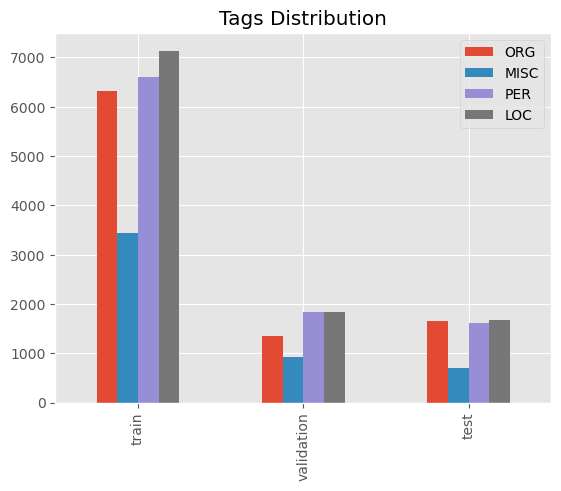

In [9]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

pd.DataFrame.from_dict(split2freqs, orient="index").plot(kind='bar',title='Tags Distribution');

We have a small numbers of *MISC* tags, but all datasets have the same distribution.

# Tokenization

We'll use the transformers library to tokenize the text and convert it into features that can be fed into the NER model.

In [10]:
from transformers import AutoTokenizer

model_name = 'distilbert-base-cased'
tokenizer = AutoTokenizer.from_pretrained(model_name)

In [11]:
# check if the fast version available
tokenizer.is_fast

True

In [12]:
# try tokenizer
inputs = tokenizer(datasets["train"][0]["tokens"], is_split_into_words=True)
print(inputs.tokens())

['[CLS]', 'EU', 'rejects', 'German', 'call', 'to', 'boycott', 'British', 'la', '##mb', '.', '[SEP]']


The 2 special tokens *([CLS] and [SEP])* and the word *lamb*, however, was tokenized into two subwords, *la and ##mb*. This introduces a mismatch between our inputs and the labels

We need to make sure we align all the labels with the proper words.

In [13]:
inputs.word_ids()

[None, 0, 1, 2, 3, 4, 5, 6, 7, 7, 8, None]

In [14]:
def align_labels_with_tokens(labels, word_ids):
    new_labels = []
    current_word = None
    for word_id in word_ids:
        if word_id != current_word:
            # Start of a new word!
            current_word = word_id
            label = -100 if word_id is None else labels[word_id]
            new_labels.append(label)
        elif word_id is None:
            # Special token
            new_labels.append(-100)
        else:
            # Same word as previous token
            label = labels[word_id]
            # If the label is B-XXX we change it to I-XXX
            if label % 2 == 1:
                label += 1
            new_labels.append(label)

    return new_labels

# sanity chcek
labels = datasets["train"][0]["ner_tags"]
word_ids = inputs.word_ids()
print(labels)
print(align_labels_with_tokens(labels, word_ids))

[3, 0, 7, 0, 0, 0, 7, 0, 0]
[-100, 3, 0, 7, 0, 0, 0, 7, 0, 0, 0, -100]


In [15]:
def tokenize_and_align_labels(examples):
    tokenized_inputs = tokenizer(
        examples["tokens"], truncation=True, is_split_into_words=True
    )
    all_labels = examples["ner_tags"]
    new_labels = []
    for i, labels in enumerate(all_labels):
        word_ids = tokenized_inputs.word_ids(i)
        new_labels.append(align_labels_with_tokens(labels, word_ids))

    tokenized_inputs["labels"] = new_labels
    return tokenized_inputs

tokenized_datasets = datasets.map(
    tokenize_and_align_labels,
    batched=True,
    remove_columns=datasets["train"].column_names,
)

  0%|          | 0/15 [00:00<?, ?ba/s]

  0%|          | 0/4 [00:00<?, ?ba/s]

  0%|          | 0/4 [00:00<?, ?ba/s]

In [16]:
tokenized_datasets

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 14042
    })
    validation: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 3251
    })
    test: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 3454
    })
})

# Padding with DataCollator

In [17]:
%env TOKENIZERS_PARALLELISM=false

env: TOKENIZERS_PARALLELISM=false


In [18]:
# pad labels
from transformers import DataCollatorForTokenClassification

data_collator = DataCollatorForTokenClassification(tokenizer=tokenizer)

In [19]:
# sanity check
batch = data_collator([tokenized_datasets["train"][i] for i in range(2)])
batch["labels"]

You're using a DistilBertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


tensor([[-100,    3,    0,    7,    0,    0,    0,    7,    0,    0,    0, -100],
        [-100,    1,    2, -100, -100, -100, -100, -100, -100, -100, -100, -100]])

# Evaluation

In [20]:
%%capture
!pip install seqeval evaluate

In [21]:
import evaluate
# from datasets import load_metric

metric = evaluate.load("seqeval")

This metric does not behave like the standard accuracy: it will actually take the lists of labels as strings, not integers, so we will need to fully decode the predictions and labels before passing them to the metric.

In [22]:
labels = datasets["train"][0]["ner_tags"]
labels = [label_names[i] for i in labels]
labels

['B-ORG', 'O', 'B-MISC', 'O', 'O', 'O', 'B-MISC', 'O', 'O']

In [23]:
# We can then create fake predictions for those by just changing the value at index 2:
predictions = labels.copy()
predictions[2] = "O"

from pprint import pprint
pprint(metric.compute(predictions=[predictions], references=[labels]))

{'MISC': {'f1': 0.6666666666666666,
          'number': 2,
          'precision': 1.0,
          'recall': 0.5},
 'ORG': {'f1': 1.0, 'number': 1, 'precision': 1.0, 'recall': 1.0},
 'overall_accuracy': 0.8888888888888888,
 'overall_f1': 0.8,
 'overall_precision': 1.0,
 'overall_recall': 0.6666666666666666}


In [24]:
import numpy as np

def compute_metrics(eval_preds):
    logits, labels = eval_preds
    predictions = np.argmax(logits, axis=-1)

    # Remove ignored index (special tokens) and convert to labels
    true_labels = [[label_names[l] for l in label if l != -100] for label in labels]
    true_predictions = [
        [label_names[p] for (p, l) in zip(prediction, label) if l != -100]
        for prediction, label in zip(predictions, labels)
    ]
    all_metrics = metric.compute(predictions=true_predictions, references=true_labels)
    return {
            "precision": all_metrics["overall_precision"],
            "recall": all_metrics["overall_recall"],
            "f1": all_metrics["overall_f1"],
            "accuracy": all_metrics["overall_accuracy"],
            }

# Model

We will use the `AutoModelForTokenClassification` class. The main thing to remember when defining this model is to pass along some information on the number of labels we have. The easiest way to do this is to pass that number with the num_labels argument, but if we want a nice inference widget working like the one we saw at the beginning of this section, it’s better to set the correct label correspondences instead.

**DistilBERT** is a small, fast, cheap and light Transformer model based on **Bert** architecture. It has 40% less parameters than bert-base-uncased, runs 60% faster while preserving 97% of BERT’s performances as measured on the GLUE language understanding benchmark.

The difference between `DistilBERT-base-cased` and `DistilBERT-base-uncased` is that in `DistilBERT-base-cased`, accent markers are preserved while in `DistilBERT-base-uncased`, accent markers are stripped out.

In most applications, `uncased` is better than `cased` except in applications where case information of text is important such as **Named Entity Recognition** and **Part-of-Speech** tagging

In [25]:
id2label = {i: label for i, label in enumerate(label_names)}
label2id = {v: k for k, v in id2label.items()}

In [26]:
from transformers import AutoModelForTokenClassification
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = AutoModelForTokenClassification.from_pretrained(model_name,
                                                        id2label=id2label,
                                                        label2id=label2id,
                                                        ).to(device)

Some weights of the model checkpoint at distilbert-base-cased were not used when initializing DistilBertForTokenClassification: ['vocab_layer_norm.weight', 'vocab_projector.weight', 'vocab_transform.weight', 'vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_transform.bias']
- This IS expected if you are initializing DistilBertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForTokenClassification were not initialized from the model checkpoint at distilbert-base-cased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this 

In [27]:
# double-check that our model has the right number of labels
model.config.num_labels

9

# Fine Tune

In [28]:
from transformers import TrainingArguments

num_epochs = 3
batch_size = 32
logging_steps = len(tokenized_datasets["train"]) // batch_size

training_args = TrainingArguments(
    'distilbert-finetuned-ner',
    log_level="error",
    num_train_epochs=num_epochs,
    learning_rate=3e-5,
    per_device_train_batch_size=batch_size, 
    per_device_eval_batch_size=batch_size,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    save_steps=1e6,
    weight_decay=0.01,
    disable_tqdm=False, 
    logging_steps=logging_steps,
    report_to='none',
    push_to_hub=False)

In [29]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
    data_collator=data_collator,
    compute_metrics=compute_metrics,
    tokenizer=tokenizer,
)
trainer.train()

/opt/conda/lib/python3.7/site-packages/transformers/optimization.py:395: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy
1,0.204600,0.089923,0.868946,0.893807,0.881201,0.972008
2,0.061500,0.064428,0.899511,0.927970,0.913519,0.981574
3,0.035400,0.064268,0.905852,0.932683,0.919071,0.982899


TrainOutput(global_step=1317, training_loss=0.1003404812224, metrics={'train_runtime': 148.9503, 'train_samples_per_second': 282.819, 'train_steps_per_second': 8.842, 'total_flos': 582846809807304.0, 'train_loss': 0.1003404812224, 'epoch': 3.0})

In [30]:
trainer.evaluate()

{'eval_loss': 0.06426816433668137,
 'eval_precision': 0.9058515854854527,
 'eval_recall': 0.9326825984516998,
 'eval_f1': 0.9190713101160862,
 'eval_accuracy': 0.9828986872314123,
 'eval_runtime': 5.8349,
 'eval_samples_per_second': 557.165,
 'eval_steps_per_second': 17.481,
 'epoch': 3.0}

In [31]:
def align_predictions(predictions, label_ids):
    preds = np.argmax(predictions, axis=2)
    batch_size, seq_len = preds.shape
    labels_list, preds_list = [], []

    for batch_idx in range(batch_size):
        example_labels, example_preds = [], []
        for seq_idx in range(seq_len):
            # Ignore label IDs = -100
            if label_ids[batch_idx, seq_idx] != -100:
                example_labels.append(id2label[label_ids[batch_idx][seq_idx]])
                example_preds.append(id2label[preds[batch_idx][seq_idx]])

        labels_list.append(example_labels)
        preds_list.append(example_preds)

    return preds_list, labels_list

# Error Analysis

In [32]:
from torch.nn.functional import cross_entropy

def forward_pass_with_label(batch):
    # Convert dict of lists to list of dicts suitable for data collator
    features = [dict(zip(batch, t)) for t in zip(*batch.values())]
    # Pad inputs and labels and put all tensors on device
    batch = data_collator(features)
    input_ids = batch["input_ids"].to(device)
    attention_mask = batch["attention_mask"].to(device)
    labels = batch["labels"].to(device)
    with torch.no_grad():
        # Pass data through model  
        output = trainer.model(input_ids, attention_mask)
        # Logit.size: [batch_size, sequence_length, classes]
        # Predict class with largest logit value on classes axis
        predicted_label = torch.argmax(output.logits, axis=-1).cpu().numpy()
    # Calculate loss per token after flattening batch dimension with view
    loss = cross_entropy(output.logits.view(-1, 9), 
                         labels.view(-1), reduction="none")
    # Unflatten batch dimension and convert to numpy array
    loss = loss.view(len(input_ids), -1).cpu().numpy()

    return {"loss":loss, "predicted_label": predicted_label}

In [45]:
valid_set = tokenized_datasets["validation"]
valid_set = valid_set.map(forward_pass_with_label, batched=True, batch_size=32)
df = valid_set.to_pandas()

  0%|          | 0/102 [00:00<?, ?ba/s]

In [46]:
id2label[-100] = "IGN"
df["input_tokens"] = df["input_ids"].apply(
    lambda x: tokenizer.convert_ids_to_tokens(x))
df["predicted_label"] = df["predicted_label"].apply(
    lambda x: [id2label[i] for i in x])
df["labels"] = df["labels"].apply(
    lambda x: [id2label[i] for i in x])
df['loss'] = df.apply(
    lambda x: x['loss'][:len(x['input_ids'])], axis=1)
df['predicted_label'] = df.apply(
    lambda x: x['predicted_label'][:len(x['input_ids'])], axis=1)

df = df.sample(frac = 1)
df.head(1)

,input_ids,attention_mask,labels,loss,predicted_label,input_tokens
2098,"[101, 15628, 3625, 131, 9347, 1670, 6838, 191,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[IGN, O, O, O, B-ORG, I-ORG, I-ORG, O, B-ORG, ...","[0.0, 0.0010176486, 0.00049149833, 0.000343621...","[O, O, O, O, B-ORG, I-ORG, I-ORG, O, B-ORG, O]","[[CLS], Playing, Sunday, :, Queens, Park, Rang..."


In [47]:
df_tokens = df.apply(pd.Series.explode)
df_tokens = df_tokens.query("labels != 'IGN'")
df_tokens["loss"] = df_tokens["loss"].astype(float).round(2)
df_tokens.head(7)

,input_ids,attention_mask,labels,loss,predicted_label,input_tokens
2098,15628,1,O,0.0,O,Playing
2098,3625,1,O,0.0,O,Sunday
2098,131,1,O,0.0,O,:
2098,9347,1,B-ORG,0.0,B-ORG,Queens
2098,1670,1,I-ORG,0.0,I-ORG,Park
2098,6838,1,I-ORG,0.0,I-ORG,Rangers
2098,191,1,O,0.0,O,v


In [48]:
(
    df_tokens.groupby("input_tokens")[["loss"]]
    .agg(["count", "mean", "sum"])
    .droplevel(level=0, axis=1)  # Get rid of multi-level columns
    .sort_values(by="sum", ascending=False)
    .reset_index()
    .round(2)
    .head(10)
    .T
)

,0,1,2,3,4,5,6,7,8,9
input_tokens,-,.,##E,A,B,##AN,##S,F,##O,(
count,2034,3087,86,147,148,43,120,82,103,679
mean,0.06,0.02,0.71,0.39,0.32,1.02,0.32,0.47,0.36,0.05
sum,126.59,66.41,61.39,57.47,46.91,44.02,38.66,38.64,36.96,35.97


In [49]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize="true")
    fig, ax = plt.subplots(figsize=(6, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
    plt.title("Normalized confusion matrix")
    plt.show()
     

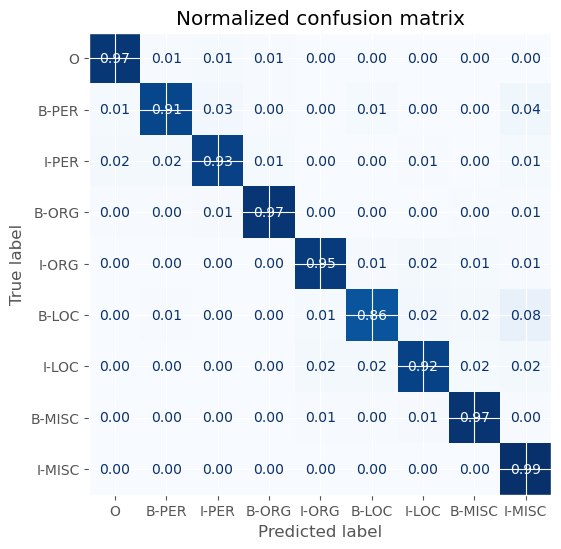

In [50]:
plot_confusion_matrix(df_tokens["labels"], df_tokens["predicted_label"],
                      tags.feature.names)

# Resources

- [Natural Language Processing with Transformers](https://transformersbook.com/)
- [HuggingFace Course](https://huggingface.co/course/chapter7/2?fw=pt)